# Contexte

L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.




### Idée application :

- S'affranchir des règles de calcul du nutriscore afin de pouvoir prédire le score pour un aliment à partir d'une liste restreinte de nutriments?




### Spécificités du calcul du Score Nutritionnel


Pour établir le classement de l’aliment, les fabricants et les distributeurs du secteur alimentaire se conforment aux règles de calcul suivantes à mettre en oeuvre successivement:

- le calcul d’un score nutritionnel de l’aliment.
- le classement de l’aliment dans l’échelle nutritionnelle à cinq couleurs sur la base du score calculé. 

Le calcul du score nutritionnel des aliments est calculé de façon identique pour tous les aliments, sauf pour les fromages, les matières grasses végétales ou animales, les boissons. 

Pour ces catégories d’aliments, des adaptations mentionnées au 2. sont à prendre en compte.

 
 
1) Cas général Le score nutritionnel des aliments repose sur le calcul d’un score unique et global prenant en compte, pour chaque aliment: 

- Une composante dite «négative» N: 
    - La composante N du score prend en compte les éléments nutritionnels dont il est recommandé de limiter la consommation: 
        * densité énergétique (apport calorique en kJ pour 100 g d’aliment),
        * teneurs en acides gras saturés (AGS),
        * en sucres simples (en g pour 100 g d’aliment),
        * et en sel (en mg pour 100 g d’aliment). 
            
          Sa valeur correspond à la somme des points attribués, de 1 à 10, en fonction de la teneur de la composition nutritionnelle de l’aliment (cf. tableau 1).
          
          La note pour la composante N peut aller de 0 à 40.


- Une composante dite «positive» P:
    - La composante P est calculée en fonction de la teneur de l’aliment :
         * en fruits et légumes,
         * légumineuses et fruits à coque, au titre des vitamines qu’ils contiennent,
         * en fibres et en protéines (exprimées en g pour 100 g d’aliment).
            
           Pour chacun de ces éléments, des points, allant de 1 à 5, sont attribués en fonction de leur teneur dans l’aliment (cf. tableau 2).
           La note pour la composante positive P peut aller de 0 à 15.

- Le calcul final du score nutritionnel se fait en soustrayant à la note de la composante négative N la note de la composante positive P avec quelques conditionnalités décrites ci-après.
     - Score nutritionnel = Total Points N – Total Points P 
     - La note finale du score nutritionnel attribuée à un aliment est donc susceptible d’être comprise entre une valeur théorique de – 15 (le plus favorable sur le plan nutritionnel) et une valeur théorique de + 40 (le plus défavorable sur le plan nutritionnel).

2) Cas particuliers

- Application de règles spécifiques: 
    * Si le total de la composante N est inférieur à 11 points, alors le score nutritionnel est égal au total des points de la composante N retranché du total de la composante P.
    * Si le total de la composante N est supérieur ou égal à 11 points,
        - Si les points pour «fruits & légumes» sont égaux à 5, alors le score nutritionnel est égal au total des points de la composante N retranché du total de la composante P. 
        - Si les points pour «fruits & légumes» sont inférieurs à 5, alors le score nutritionnel est égal au total des points de la composante N retranché de la somme des points «Fibres» et des points «fruits & légumes». Dans ce cas la teneur en protéines n’est donc pas prise en compte pour le calcul du score nutritionnel.

-  Les fromages :
     * Le score est calculé en prenant en compte la teneur en protéines que le total des points N soit ≥ 11 ou non,
         Score nutritionnel = Total Points N – Total Points P – Les matières grasses ajoutées 
     * La grille d’attribution des points pour les acides gras est calculée sur la composante AGS/lipides totaux avec un démarrage de la grille d’attribution des points à 10 % et un pas ascendant de 6 %.



****************************************

## Intentions du nettoyage des données:

   * Trouver les variables relatives au nutriments pris en compte pour le calcul du nutriscore
   * Décider quelle stratégie de gestion des valeurs manquantes au vu du jeu de données
   * Filtrer les erreurs de renseignement du jeu de données


*************************************

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import gc
import missingno as msno
# import dataprep.eda as eda


In [2]:
import pandas as pd
pd.set_option('display.max_row', 183)
pd.set_option('display.max_column', None)

## Chargement des données

In [3]:
%%time
# Chargement du jeu de données dans le DataFrame data
data = pd.read_csv("../Données/en.openfoodfacts.org.products.csv",sep='\t',encoding='utf-8',
                     dtype={'code': object,
                             'packaging_text' : object,
                             'origins': object,
                             'origins_tags': object,
                             'origins_en': object,
                             'manufacturing_places': object,
                             'manufacturing_places_tags': object,
                             'emb_codes': object,
                             'emb_codes_tags': object,
                             'first_packaging_code_geo': object,
                             'cities_tags': object,
                             'ingredients_from_palm_oil_tags': object,
                             'brand_owner': object,
                           })

Wall time: 60 s


Affichage du chargement

In [4]:
data.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1,15.0,

****************************************

# Etude des variables et de leur signification


##  Analyse du contenu de chaque colonne

Forme:
- 183 variables et 1 555 491 produits
     * 123 variables quantitatives de type float64
     * 52 variables qualiatives de type object
     * 2 de type int

In [5]:
data.shape

(1555491, 183)

Types de varialbles présentes

In [6]:
data.dtypes.value_counts()

float64    123
object      58
int64        2
dtype: int64

In [7]:
data.select_dtypes('object').head(0).T

""
code
url
creator
created_datetime
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags


Description du contenu des variables ( données data-fields.txt source openfoodfact)

- fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)

In [8]:
data.columns[data.columns.str.endswith('_t')]

Index(['created_t', 'last_modified_t'], dtype='object')

- fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ

- fields that end with _tags are comma separated list of tags (e.g. categories_tags is the set of normalized tags computer from the categories field)

In [9]:
data.columns[data.columns.str.endswith('_tags')]

Index(['packaging_tags', 'brands_tags', 'categories_tags', 'origins_tags',
       'manufacturing_places_tags', 'labels_tags', 'emb_codes_tags',
       'cities_tags', 'countries_tags', 'traces_tags', 'additives_tags',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'states_tags'],
      dtype='object')

- fields that end with a language 2 letter code (e.g. fr for French) is the set of tags in that language

In [10]:
data.columns[data.columns.str.endswith('_en')]

Index(['categories_en', 'origins_en', 'labels_en', 'countries_en',
       'allergens_en', 'traces_en', 'additives_en', 'states_en',
       'main_category_en'],
      dtype='object')

In [11]:
data.columns[data.columns.str.endswith('_fr')]

Index([], dtype='object')

## Description des variables object

| Nom de la variable           | Description                                                                                                                                                                           |
|------------------------------|--------------------------------------------------|
| code                         | barcode of the product (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix |
| url                          | url of the product page on Open Food Facts                                                                                                                                            |
| creator                      | contributor who first added the product                                                                                                                                               |
| created_datetime             | date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)                                                                                                                |
| last_modified_datetime       | last_modified_datetime                                                                                                                                                                |
| product_name                 | name of the product                                                                                                                                                                   |
| quantity                     | quantity and unit                                                                                                                                                                     |
| packaging                    | shape, material                                                                                                                                                                       |
| packaging_tags               | packaging_tags                                                                                                                                                                        |
| brands                       | brands                                                                                                                                                                                      |
| brands_tags                  |  brands tags                                                                                                                                                                                     |
| categories                   |  categories                                                                                                                                                                                     |
| categories\_tags             |  categories tags                                                                                                                                                                                     |
| categories\_en               |  categories tags english                                                                                                                                                                                    |
| labels                       |  labels                                                                                                                                                                                    |
| labels\_tags                 |  labels  tags                                                                                                                                                                                     |
| labels\_en                   |  labels  tags english                                                                                                                                                                                     |
| stores                       |  stores                                                                                                                                                                                      |
| countries                    |  countries                                                                                                                                                                                     |
| countries_tags               |  countries tags                                                                                                                                                                                     |
| countries_en                 |  countries tags english                                                                                                                                                                                     |
| ingredients_text             |  list of ingredients                                                                                                                                                                                     |
| allergens                    |  list of allergens                                                                                                                                                                                     |
| serving_size                 |  serving size                                                                                                                                                                                     |
| additives_tags               |  additives tags                                                                                                                                                                                     |
| additives\_en                |  additives tags english                                                                                                                                                                                    |
| nutriscore\_grade            |   nutriscore  grade                                                                                                                                                                                    |
| pnns\_groups_1               |  programme nationnal nutrition-santé 1, groupes de produits                                                                                                                                                                                |
| pnns_groups_2                |  programme nationnal nutrition-santé 2, groupes de produits                                                                                                                                                                                     |
| states                       |  states                                                                                                                                                                                     |
| states_tags                  |  states tags                                                                                                                                                                                     |
| states_en                    |  states tags  english                                                                                                                                                                                 |
| brand_owner                  |  brand owner                                                                                                                                                                                     |
| main_category                |  main category                                                                                                                                                                                      |
| main_category_en             |   main category english                                                                                                                                                                                     |
| image_url                    |  url image                                                                                                                                                                                      |
| image_small_url              |  url small image                                                                                                                                                                                     |
| image\_ingredients_url       |  url ingredients image                                                                                                                                                                                  |
| image\_ingredients_small_url |  url ingredients small image                                                                                                                                                                                   |
| image\_nutrition_url         |  url nutrition image                                                                                                                                                                                    |
| image\_nutrition_small_url   |  url nutrition  small image                                                                                                                                                                                     |



In [12]:
data.select_dtypes('float').head(0).T

""
cities
allergens_en
serving_quantity
no_nutriments
additives_n
additives
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil


# Description des variables Nutriments:

| Nom de la variable           | Description                                                                                   |                                                                                                                                         
|------------------|--------------------------------------------------|
energy_100g |   valeur energétique en kj pour 100g                                                       |      
energy-kj_100g |    idem                         |    
energy-kcal_100g |  valeur energétique en Kcal                            |    
proteins_100g  |      protéines pour 100g                       |    
casein_100g    |      caseine pour 100g                       |    
serum-proteins_100g |                             |    
nucleotides_100g |                             |    
carbohydrates_100g  |                             |    
sugars_100g        |         sucres                    |    
-glucose_100g       |       tous les champs commençant par - sont des sous nutriments                      |    
-fructose_100g      |                             |    
-lactose_100g       |                             |    
-maltose_100g       |                             |    
-maltodextrins_100g  |                             |    
starch_100g       |                             |    
polyols_100g      |                             |    
fat_100g                         |                             |    
saturated-fat_100g               |    Acides Gras Saturés                         |    
-butyric-acid_100g                |  tous les acid et vitamines sont en mg pour 100g                           |    
-caproic-acid_100g                |                             |    
-caprylic-acid_100g               |                             |    
-capric-acid_100g                 |                             |    
-lauric-acid_100g                 |                             |    
-myristic-acid_100g               |                             |    
-palmitic-acid_100g               |                             |    
-stearic-acid_100g                     |                             |    
-arachidic-acid_100g                   |                             |            |                                 
-behenic-acid_100g                     |                             |            |                                 
-lignoceric-acid_100g                  |                             |            |                                 
-cerotic-acid_100g                     |                             |            |                                 
-montanic-acid_100g                    |                             |            |                                 
-melissic-acid_100g                    |                             |            |                                 
monounsaturated-fat_100g              |                             |            |                                 
polyunsaturated-fat_100g              |                             |                     |
omega-3-fat_100g                      |                             |             |
-alpha-linolenic-acid_100g             |                             |                      |
-eicosapentaenoic-acid_100g            |                             |                       |
-docosahexaenoic-acid_100g             |                             |                      |
omega-6-fat_100g                      |                             |             |
-linoleic-acid_100g                    |                             |               |
-arachidonic-acid_100g                 |                             |                  |
-gamma-linolenic-acid_100g             |                             |                      |
-dihomo-gamma-linolenic-acid_100g                     |                             |    
omega-9-fat_100g                                     |                             |    
-oleic-acid_100g                                      |                             |    
-elaidic-acid_100g                                    |                             |    
-gondoic-acid_100g                                    |                             |    
-mead-acid_100g                                       |                             |    
-erucic-acid_100g                                     |                             |    
-nervonic-acid_100g                                   |                             |    
trans-fat_100g                                       |                             |    
cholesterol_100g                                     |                             |    
fiber_100g                                      |       Teneur en fibres                      |    
-soluble-fiber_100g                                      |                             |   
-insoluble-fiber_100g                                     |                             |    
sodium_100g                                     |                             |    
alcohol_100g : % vol of alcohol                      |    pourcentage d'alcool                         |    
vitamin-a_100g                                       |                             |    
vitamin-d_100g                                       |                             |    
vitamin-e_100g                                       |                             |    
vitamin-k_100g                                       |                             |    
vitamin-c_100g                                       |                             |    
vitamin-b1_100g                                    |                             |   
vitamin-b2_100g                                    |                             |   
vitamin-pp_100g                                    |                             |   
vitamin-b6_100g                                    |                             |   
vitamin-b9_100g                                    |                             |   
vitamin-b12_100g                                   |                             |   
biotin_100g: also known as Vitamine B8                                  |                             |    
pantothenic-acid_100g: also known as Vitamine B5                              |                             |    
silica_100g                               |                             |    
bicarbonate_100g                          |                             |    
potassium_100g                            |                             |    
chloride_100g                             |                             |    
calcium_100g                              |                             |    
phosphorus_100g                           |                             |    
iron_100g                                 |                             |    
magnesium_100g                            |                             |    
zinc_100g                                 |                             |    
copper_100g                               |                             |    
manganese_100g                            |                             |    
fluoride_100g                             |                             |    
selenium_100g                             |                             |    
chromium_100g                             |                             |    
molybdenum_100g                           |                             |    
iodine_100g                                    |                             |    
caffeine_100g                                  |                             |    
taurine_100g                                   |                             |    
ph_100g : pH (no unit)                         |                             |    
fruits-vegetables-nuts_100g                    |                             |    
% of fruits, vegetables and nuts (excluding potatoes, yams, manioc)                    |                             |    
carbon-footprint_100g                                    |                             |    
carbon footprint (as indicated on the packaging of some product)|                             |    
nutrition-score-fr_100g |                             |    
Nutri-Score | Nutrition score derived from the UK FSA score and adapted for the French market (formula defined by the team of Professor Hercberg)     |                             |    
nutrition-score-uk_100g |    nutrition score defined by the UK Food Standards Administration (FSA)                    |                             

In [13]:
data.select_dtypes('int').head()

""
0
1
2
3
4


***********************************************************

## De toutes ces variables je ne retiens que celles qui servent de support au calcul du nutriscore:

### Composante Négative:

- 'energy_100g' : densité énergétique (apport calorique en kJ pour 100 g d’aliment)
- 'saturated-fat_100g' : teneurs en acides gras saturés (AGS)
- 'sugars_100g' : sucres simples (en g pour 100 g d’aliment)
- 'salt_100g' : sel (en mg pour 100 g d’aliment)



### Composante positive :

- 'proteins_100g' : protéines (en g pour 100 g d’aliment)
- 'fiber_100g' : fibres (en g pour 100 g d’aliment)
- fruits-vegetables-nuts-estimate_100g , fruits-vegetables-nuts_100g , fruits-vegetables-nuts-dried_100g : au titre des vitamines qu’ils contiennent

A des fins de compréhension et d'interprétation des résultats la variable contennat le nom des produits est prise en considération. 

*************************************************************
# Nettoyage des données

Suppression des lignes dupliquées

In [14]:
data[data.duplicated()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
932879,3760228431501,http://world-en.openfoodfacts.org/product/3760...,kiliweb,1600199086,2020-09-15T19:44:46Z,1603709587,2020-10-26T10:53:07Z,Crème glacée au lait frais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,218.0,912.0,NaN,9.98,5.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Suppression des 4 lignes doublonnées

In [15]:
data=data.drop_duplicates()

In [16]:
# Function calculant le nombre de valeurs manquantes (Nan) par colonnes 
def missing_values(table):
        # Total Nan
        mis_val = table.isnull().sum()
        
        # Pourcentage de  Nan
        mis_val_percent = table.isnull().sum() / len(table) * 100
        
        # Data Frame contenant les résultats
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Nommage des colonnes
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valeurs manquantes', 1 : '% du Total des valeurs'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% du Total des valeurs', ascending=True).round(2)
        
        # Affichage du nom de la table analysée
        # du nombre de colonnes concernées par des valeurs manquantes
        print (" Data Frame a " + str(table.shape[1]) + " colonnes.\n"      
            "Dont " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes contiennent des valeurs manquantes.")
        
        # Retourne la tables contenant les stats par colonnes
        return mis_val_table_ren_columns.T

Complétion du jeu de données

In [17]:
missing_values(data)

 Data Frame a 183 colonnes.
Dont 174 colonnes contiennent des valeurs manquantes.


,creator,pnns_groups_2,countries,countries_en,countries_tags,pnns_groups_1,product_name,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,energy-kcal_100g,image_small_url,image_url,brands,brands_tags,categories,main_category,main_category_en,categories_en,categories_tags,image_nutrition_small_url,image_nutrition_url,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,ingredients_text,image_ingredients_small_url,image_ingredients_url,nutrition-score-fr_100g,nutriscore_grade,nutriscore_score,nova_group,fiber_100g,serving_quantity,serving_size,quantity,additives_tags,additives_en,labels_en,labels_tags,labels,brand_owner,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g,packaging,packaging_tags,vitamin-c_100g,vitamin-a_100g,stores,allergens,purchase_places,energy-kj_100g,traces_en,traces_tags,generic_name,manufacturing_places,manufacturing_places_tags,emb_codes,emb_codes_tags,potassium_100g,traces,cities_tags,origins,origins_tags,origins_en,first_packaging_code_geo,polyunsaturated-fat_100g,monounsaturated-fat_100g,ingredients_that_may_be_from_palm_oil_tags,vitamin-pp_100g,vitamin-b1_100g,vitamin-b2_100g,alcohol_100g,vitamin-b6_100g,magnesium_100g,ingredients_from_palm_oil_tags,phosphorus_100g,vitamin-b12_100g,fruits-vegetables-nuts-estimate_100g,carbon-footprint-from-meat-or-fish_100g,zinc_100g,vitamin-b9_100g,vitamin-d_100g,fruits-vegetables-nuts_100g,folates_100g,pantothenic-acid_100g,cocoa_100g,copper_100g,manganese_100g,-soluble-fiber_100g,polyols_100g,-insoluble-fiber_100g,vitamin-e_100g,selenium_100g,iodine_100g,omega-3-fat_100g,phylloquinone_100g,vitamin-k_100g,packaging_text,biotin_100g,energy-from-fat_100g,-lactose_100g,chloride_100g,omega-6-fat_100g,starch_100g,carbon-footprint_100g,-alpha-linolenic-acid_100g,caffeine_100g,bicarbonate_100g,fluoride_100g,collagen-meat-protein-ratio_100g,fruits-vegetables-nuts-dried_100g,molybdenum_100g,-linoleic-acid_100g,chromium_100g,ph_100g,-docosahexaenoic-acid_100g,taurine_100g,-sucrose_100g,-eicosapentaenoic-acid_100g,silica_100g,beta-carotene_100g,-fructose_100g,omega-9-fat_100g,-glucose_100g,-arachidonic-acid_100g,-arachidic-acid_100g,inositol_100g,casein_100g,choline_100g,serum-proteins_100g,beta-glucan_100g,nutrition-score-uk_100g,-oleic-acid_100g,-behenic-acid_100g,carnitine_100g,-maltodextrins_100g,nucleotides_100g,-lauric-acid_100g,-maltose_100g,-capric-acid_100g,-gamma-linolenic-acid_100g,-butyric-acid_100g,-palmitic-acid_100g,-cerotic-acid_100g,chlorophyl_100g,glycemic-index_100g,-caprylic-acid_100g,-montanic-acid_100g,-stearic-acid_100g,-myristic-acid_100g,-dihomo-gamma-linolenic-acid_100g,-caproic-acid_100g,water-hardness_100g,cities,-erucic-acid_100g,-nervonic-acid_100g,allergens_en,-mead-acid_100g,additives,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil,-lignoceric-acid_100g,-elaidic-acid_100g,-melissic-acid_100g,no_nutriments,-gondoic-acid_100g
Valeurs manquantes,4.0,3592.00,5158.00,5162.00,5162.00,18546.00,79550.00,316294.00,324780.00,325847.00,326410.00,347352.00,353088.0,353093.0,371943.00,383845.00,442446.00,442446.00,699865.00,699921.0,765587.00,765589.00,765589.00,765589.00,765589.00,876566.00,876566.00,894712.00,894712.00,894712.00,894713.00,910402.00,910402.00,938440.00,938440.00,938440.00,977765.00,1100965.00,1106503.00,1107278.00,1128275.00,1171715.00,1171715.00,1204381.00,1204381.00,1204405.00,1266212.0,1286478.00,1287410.00,1291317.00,1291378.00,1307312.00,1307325.00,1335975.00,1343554.00,1343620.00,1380567.00,1411890.00,1440994.00,1446275.00,1446275.00,1447578.00,1451298.0,1451344.0,1452105.00,1452134.00,1463960.00,1468462.00,1485732.00,1489594.00,1489705.00,1489705.00,1490800.00,1508551.00,1508574.00,1516493.00,1532063.00,1532270.00,1533177.00,1537874.00,1539822.00,1541034.00,1541882.00,1541965.00,1543122.00,1543869.00,1544362.00,1545465.00,1545570.00,1546230.0,1546808.00,1547060.00,1549591.00,1549785.00,1551273.00,1551515.00,1551885.00,1551993.00,15

Complétion des différentes variables quand on ne prend en compte que les produits dont on connait le nutriscore

In [18]:
missing_values(data.dropna(subset=['nutriscore_score'],axis=0))

 Data Frame a 183 colonnes.
Dont 170 colonnes contiennent des valeurs manquantes.


,creator,categories,categories_tags,categories_en,main_category,main_category_en,pnns_groups_1,countries,countries_tags,countries_en,sodium_100g,salt_100g,energy_100g,fat_100g,proteins_100g,sugars_100g,saturated-fat_100g,carbohydrates_100g,product_name,energy-kcal_100g,additives_n,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,ingredients_text,brands,brands_tags,nova_group,image_small_url,image_url,fiber_100g,serving_quantity,serving_size,image_ingredients_small_url,image_ingredients_url,image_nutrition_url,image_nutrition_small_url,additives_tags,additives_en,calcium_100g,brand_owner,cholesterol_100g,quantity,iron_100g,trans-fat_100g,vitamin-c_100g,labels_tags,labels_en,labels,vitamin-a_100g,packaging,packaging_tags,allergens,stores,purchase_places,energy-kj_100g,generic_name,traces_en,traces_tags,potassium_100g,manufacturing_places,manufacturing_places_tags,traces,emb_codes,emb_codes_tags,origins,origins_en,origins_tags,cities_tags,first_packaging_code_geo,monounsaturated-fat_100g,polyunsaturated-fat_100g,ingredients_that_may_be_from_palm_oil_tags,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,magnesium_100g,vitamin-b6_100g,phosphorus_100g,fruits-vegetables-nuts-estimate_100g,alcohol_100g,carbon-footprint-from-meat-or-fish_100g,ingredients_from_palm_oil_tags,vitamin-b12_100g,vitamin-b9_100g,zinc_100g,fruits-vegetables-nuts_100g,vitamin-d_100g,folates_100g,cocoa_100g,pantothenic-acid_100g,copper_100g,-soluble-fiber_100g,manganese_100g,-insoluble-fiber_100g,polyols_100g,vitamin-e_100g,selenium_100g,omega-3-fat_100g,phylloquinone_100g,iodine_100g,packaging_text,energy-from-fat_100g,vitamin-k_100g,-lactose_100g,biotin_100g,chloride_100g,starch_100g,omega-6-fat_100g,bicarbonate_100g,carbon-footprint_100g,fruits-vegetables-nuts-dried_100g,collagen-meat-protein-ratio_100g,caffeine_100g,fluoride_100g,-alpha-linolenic-acid_100g,molybdenum_100g,ph_100g,-docosahexaenoic-acid_100g,silica_100g,chromium_100g,-eicosapentaenoic-acid_100g,taurine_100g,beta-carotene_100g,-fructose_100g,-arachidic-acid_100g,omega-9-fat_100g,-linoleic-acid_100g,-sucrose_100g,-arachidonic-acid_100g,nutrition-score-uk_100g,beta-glucan_100g,-glucose_100g,-behenic-acid_100g,inositol_100g,-oleic-acid_100g,serum-proteins_100g,choline_100g,-lauric-acid_100g,-maltose_100g,-gamma-linolenic-acid_100g,-capric-acid_100g,glycemic-index_100g,-cerotic-acid_100g,chlorophyl_100g,-montanic-acid_100g,-butyric-acid_100g,nucleotides_100g,-palmitic-acid_100g,casein_100g,carnitine_100g,-dihomo-gamma-linolenic-acid_100g,-stearic-acid_100g,-mead-acid_100g,cities,water-hardness_100g,-erucic-acid_100g,-nervonic-acid_100g,allergens_en,no_nutriments,-melissic-acid_100g,additives,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil,-lignoceric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-maltodextrins_100g,-gondoic-acid_100g,-myristic-acid_100g,-elaidic-acid_100g
Valeurs manquantes,1.0,1.0,2.0,2.0,2.0,2.0,589.0,765.00,765.00,765.00,1243.0,1243.0,1599.00,1649.00,1650.00,1660.00,1663.00,1927.00,2367.00,53598.00,157663.00,157663.00,157663.00,157663.00,171107.00,171126.00,184310.00,243319.00,243319.00,249173.00,281937.00,282128.00,311600.0,311600.0,338304.00,338304.00,339482.00,339482.00,381773.00,383746.00,384002.00,384024.00,386421.00,388149.0,431049.00,433916.00,433916.00,433938.00,434165.00,444006.00,444010.00,468812.00,477360.00,508992.00,524365.00,532337.00,533549.00,533549.00,537889.00,538787.00,538813.00,544539.00,547834.00,547845.00,570139.0,570203.00,570203.00,572150.00,575358.00,577781.00,577801.00,589393.00,597670.00,598169.00,598280.00,605265.00,605465.00,605884.00,606058.00,607774.0,608126.00,608163.00,608217.00,608616.00,608929.00,609653.0,609675.00,609820.00,611757.00,613128.00,613478.00,613643.00,613850.00,613868.00,614446.00,614720.00,615378.00,615386.00,615575.00,615678.00,616121.00,616227.00,616320.00,616475.00,616492.00,616568.00,616636.00,616673.00,616717.00,616728.00,616765.00,616793.00,616810.00,616858.00,616862.00,616888.00,616897.0

Les variables nécessaires à l'exploitation du concept d'aplication son globalement renseignées.

### Liste des variables selectionnées


La variable product_name est ici selectionnée uniquement à des fins d'analyse de la vraissemblance des compositions en nutriments au vu du nom du produit. 

Cette variable ne sera pas prise en compte dans l'établissement du score.

In [19]:
col_retenues=['nutriscore_score','product_name',
              'energy_100g','saturated-fat_100g','sugars_100g','salt_100g',
              'proteins_100g','fiber_100g','fruits-vegetables-nuts-estimate_100g',
                      'fruits-vegetables-nuts_100g','fruits-vegetables-nuts-dried_100g']

Réduction du jeu de données à la liste des variables retenues

In [20]:
df=data[col_retenues].copy()

### Complétion de la table 

<AxesSubplot:>

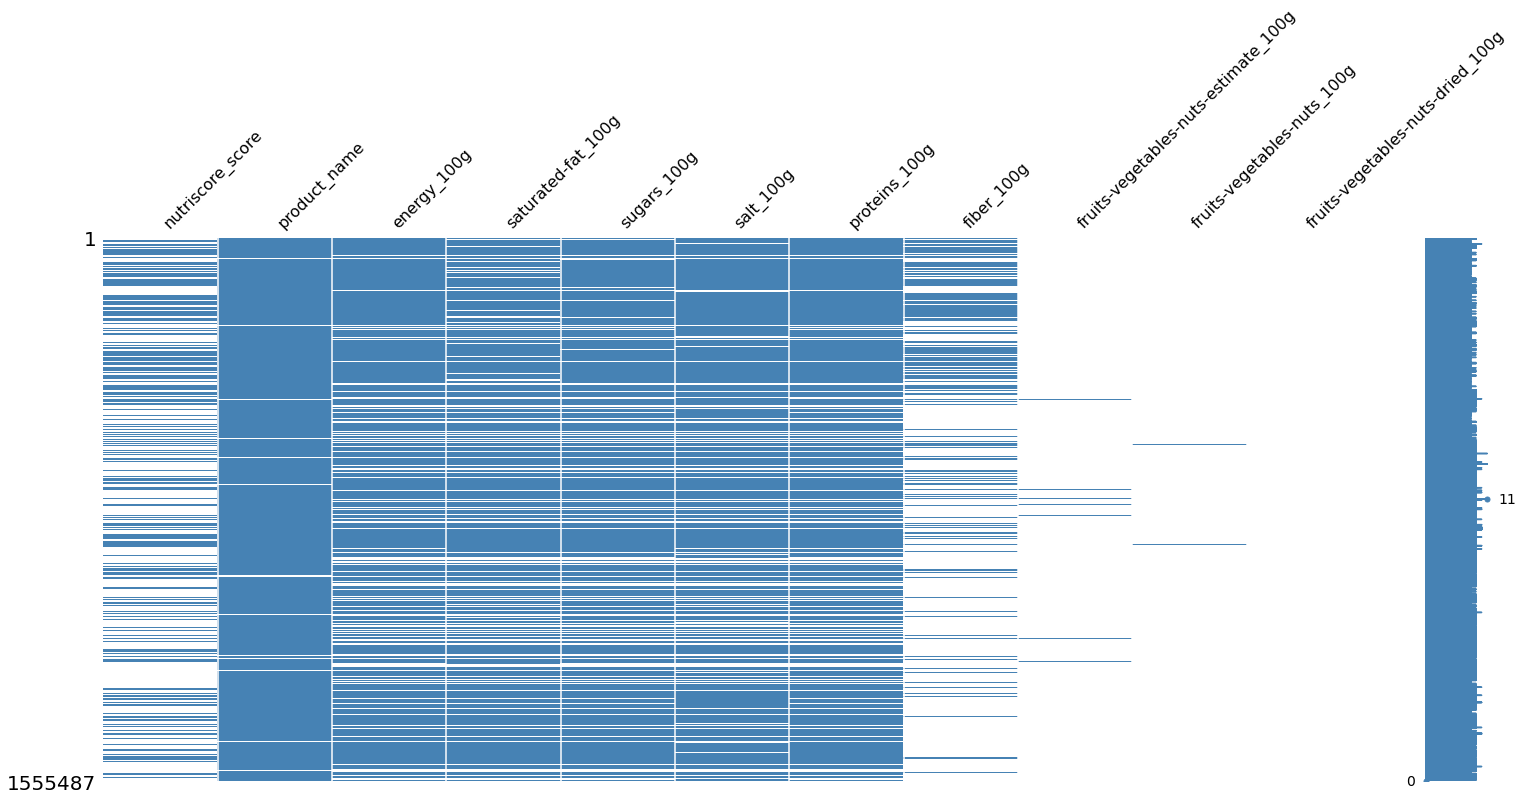

In [21]:
import missingno as msno
color=(70/255, 130/255, 180/255)
msno.matrix(df,color=color)

Beaucoup de valeurs sont manquantes.

In [22]:
missing_values(df)

 Data Frame a 11 colonnes.
Dont 11 colonnes contiennent des valeurs manquantes.


,product_name,energy_100g,proteins_100g,sugars_100g,salt_100g,saturated-fat_100g,nutriscore_score,fiber_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g
Valeurs manquantes,79550.00,316294.00,324780.00,347352.00,353088.0,371943.00,938440.00,1100965.00,1543869.00,1546808.00,1555197.00
% du Total des valeurs,5.11,20.33,20.88,22.33,22.7,23.91,60.33,70.78,99.25,99.44,99.98


Pour les 5% de produits dont le nom n'est pas renseignés la valeur 'inconnu' est imputée.

In [23]:
df['product_name']=df['product_name'].fillna('inconnu')

In [24]:
missing_values(df)

 Data Frame a 11 colonnes.
Dont 10 colonnes contiennent des valeurs manquantes.


,energy_100g,proteins_100g,sugars_100g,salt_100g,saturated-fat_100g,nutriscore_score,fiber_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g
Valeurs manquantes,316294.00,324780.00,347352.00,353088.0,371943.00,938440.00,1100965.00,1543869.00,1546808.00,1555197.00
% du Total des valeurs,20.33,20.88,22.33,22.7,23.91,60.33,70.78,99.25,99.44,99.98


Regardons le contenu des 3 colonnes relatives aux fruit et légumes qui sont trés peu renseignées

In [25]:
temp=df.iloc[:,-3:]
temp.dropna(how='all')

,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g
323,7.2,NaN,NaN
407,76.0,NaN,NaN
429,20.1,NaN,NaN
740,40.0,NaN,NaN
865,NaN,37.4,NaN
...,...,...,...
1555018,56.5,NaN,NaN
1555378,30.0,NaN,NaN
1555398,NaN,60.0,NaN
1555400,97.0,NaN,NaN


20 223 produits ont au moins une des 3 variables renseignées

Ne garder que la colonne fruits-vegetables-nuts-estimate_100g, en la complètant par les valeurs renseignées des deux autre colonnes

In [26]:
temp=temp.fillna(method='backfill',axis=1)
display(missing_values(temp))
temp.dropna(how='all')

 Data Frame a 3 colonnes.
Dont 3 colonnes contiennent des valeurs manquantes.


,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g
Valeurs manquantes,1535264.0,1546662.00,1555197.00
% du Total des valeurs,98.7,99.43,99.98


,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g
323,7.2,NaN,NaN
407,76.0,NaN,NaN
429,20.1,NaN,NaN
740,40.0,NaN,NaN
865,37.4,37.4,NaN
...,...,...,...
1555018,56.5,NaN,NaN
1555378,30.0,NaN,NaN
1555398,60.0,60.0,NaN
1555400,97.0,NaN,NaN


Regardons le nom des produits ayant une estimation de la composition en fruit_legumes_noix

In [27]:
df.loc[temp.dropna(how='all').index,'product_name'].sample(50).unique()

array(['Penne au Poulet Grillé à la Napolitaine', "Confiture d'abricot",
       "Lait d'Amande Bio", 'Riz Cantonais', 'Pur jus pomme douceur pet',
       'Mantequilla fácil de untar', 'Amandes Blanchies', 'Delinut Light',
       'La Gourmande ABRICOT',
       'Mutti Gezeefde Fluweelzachte Tomaten Met Basilicum (400 G)',
       'Haricots beurre très fins', 'Confiture Melon cuite au chaudron',
       'Mermelada mora salvajr', 'Nectar gourmand mangue origine Pérou',
       'Gelatina neutra en laminas',
       'Fromages blancs aux fruits, framboise, abricot et fraise',
       'Cacahuètes grillées et salées', 'Confiture de Clémentine',
       'Mix brasserie', 'Poêlée de légumes grillés surgelée',
       'Steak Haché de Machoiran Curry Coco',
       'Aceite de oliva virgen extra picual',
       'Confiture Artisanale Extra', 'Pizza chorizo poivrons',
       'Salade carottes rapées',
       'Juste Plaisir Smoothie Banane Mangue Passion flash pasteurisé',
       'Poelee de riz noir  légumes et 

La liste des noms des produits concernés semble cohérente avec le fait qu'ils contiennent soit des fruits, des legumes ou des noix.

Aplication de l'opération sur la table principale.

In [28]:
df.iloc[:,-3:].fillna(method='backfill',axis=1).dropna(how='all')

,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g
323,7.2,NaN,NaN
407,76.0,NaN,NaN
429,20.1,NaN,NaN
740,40.0,NaN,NaN
865,37.4,37.4,NaN
...,...,...,...
1555018,56.5,NaN,NaN
1555378,30.0,NaN,NaN
1555398,60.0,60.0,NaN
1555400,97.0,NaN,NaN


Suppression des deux dernières colonnes

In [29]:
df=df.iloc[:,:-2]

<AxesSubplot:>

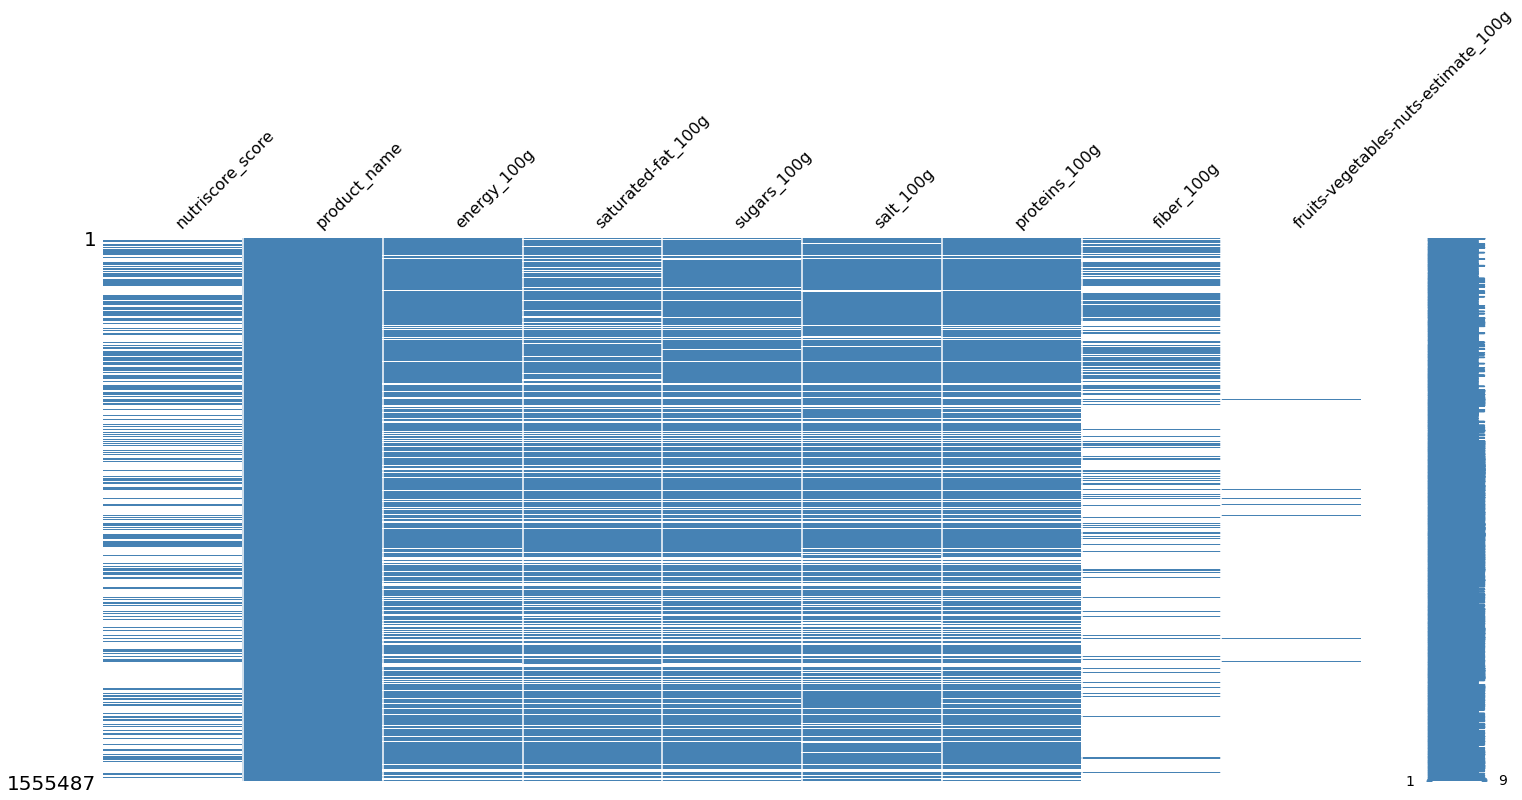

In [30]:
msno.matrix(df,color=color)

#### Première conjecture : 
    - si une variable contient des valeurs non renseignées, c'est que le produit ne contient pas le  nutriment, si la validité de l'hypothèse est validée, on imputera 0g aux valeurs manquante pour 100g.

Est-ce une bonne idée? 

On peut considérer que la quasi totalité des aliments ont une valeur energétique non nulle.

Regardons les noms des produits dont la valeur énergétique n'est pas renseignéé:
- soit le produit n'a effectivement pas de valeur energétique, ce qui confirme la première conjecture.
- soit le nom du produit nous laisse à penser que sa valeur énergétique est significativement non nulle, ce qui infirme la conjecture.

In [31]:
# Affectation à liste des index des lignes correspondant à des valeurs non renseignées de ennergy_100g
list= df['energy_100g'].isna().index
# Affichage d'un échantillon des noms des produits
df.loc[list,'product_name'].sample(50).unique()

array(['Tortilla chips', 'Ribs à la provençale',
       'Des de Harengs Creme 400G', 'Brousse allégée', 'Mixed vegetables',
       'Falafels et riz aux lentilles sauce cury', "L'exploratrice",
       'Classic Yellow Mustard', 'Tartare d algues',
       'Tippy Toes, Apple Prune', 'Dżem z pomarańczy', 'Thon',
       'Comté Guillaume', 'Mexican cornbread mix, mexican',
       'Classic bit-o-honey candies, bit-o-honey', 'Bran flakes',
       'Datteln im Speckmantel', 'Unsweetened applesauce', 'Tortellini',
       'Graines de Nigelle',
       'Ring-A-Ding Farms, Rocky Mountain Seasonal, Baby Power Greens',
       'inconnu',
       'Stretch island fruit co., all-natural fruit strip, summer strawberry, summer strawberry',
       'Ensalada china', 'Cocoa scented jungle mysteries',
       'Excellent 25% Protein Bar', 'Chocolat blanc curcuma',
       'Yaourt aux fruits avec morceaux',
       'Fromage de Hollande à pâte pressée en tranches Maasdam Original au lait pasteurisé 27%MG',
       'The b

Il apparait clairement, que sur un echantillon de la liste des produits concerné, les valeurs énergétiques sont loin d'être négligeables ce qui infirme ma conjecture.

Les valeurs non renseignées seront donc considérées comme manquantes et donc éliminées

In [32]:
df=df.dropna(subset=['energy_100g'],axis=0) 
df.shape

(1239193, 9)

**********************************************
Démarche identique pour les AGS (saturated-fat_100g)

In [33]:
# Affectation à liste des index des lignes correspondant à des valeurs non renseignées de ?????????
list= df['saturated-fat_100g'].isna().index
# Affichage d'un échantillon des noms des produits
df.loc[list,'product_name'].sample(50).unique()

array(['Wegmans, chopped walnuts', 'Compote de pommes',
       'Natural Rye Artisan Sandwich Bread', 'Bone-In Goat Cubes',
       "Taboulé à l'huile d'olive vierge extra", 'Lentilles préparées',
       'Chia', 'Jambon Supérieur 7 tranches',
       'Chop suey chicken with noodles', 'Kuru SELE',
       'Terrine de sanglier', 'Cœur des Anges', 'Yanyan Choco&straw',
       'Bonito del Norte', 'Chorizo Fort', 'Vinagre balsámico de Módena',
       'Galettes au beurre frais', 'Cola, Topstar',
       'Filet de poulet blanc', 'Rukki Tasku Täistera',
       'Judías con patatas', 'Tourtons Au Reblochon, Les 8',
       'légumes de printemps cuisinés au romarin',
       'Bifteck Viandd Bovine', 'Roast Beef Pinwheels',
       'le fraisier revisité', 'Chocolate caramel shortbread', 'Lemon',
       'Baby-cut carrots', 'Nana-Menta Peppermint tea',
       'Breakfast Wraps Sausage', 'Découpe de lapin thym citron 500gr',
       'Milk chocolate with butter biscuit & cocoa creme',
       'Bon italia, beef r

Infirmation de la conjecture quand à la teneur en AGS -> supression des lignes non renseignées sur ce nutriment

In [34]:
df=df.dropna(subset=['saturated-fat_100g'],axis=0) 
df.shape

(1178971, 9)

**********************************************
Démarche identique pour les proteienes (proteins_100g)

In [35]:
# Affectation à liste des index des lignes correspondant à des valeurs non renseignées de ?????????
list= df['proteins_100g'].isna().index
# Affichage d'un échantillon des noms des produits
df.loc[list,'product_name'].sample(50).unique()

array(['Sardinillas aceite de oliva', 'Croissant jambon emmental',
       'Allumettes de Jamon Serano', 'Café Soluble', 'Riso su riso',
       'Tourte champignons jambon', 'Regina',
       'Cream cheese & chive flavour crackers', 'Rum rozijnen vla',
       'Galettes fines au beurre', 'Berzas al natural',
       'Eau minerale naturelle sabrine', 'Cheddar cheese spread squeeze',
       'Tagliatelles carbonara', 'Lapin Chocolat au Lait Suisse',
       'Smoothie T.V. Bio', 'Bazzini, Milk Chocolate Almonds',
       'Le dorė de Lathuy', "Taboulé à l'orientale", 'Delice de légumes',
       'Tarama au crabe', 'Mango & Yoghurt royal', 'M semen', 'Knack',
       'Low Fat Yogurt Smoothie, Guanabana',
       'Sirop grenadine au sucre de canne', 'Fresubin',
       'Sauce Cuisinée Au Poivre Vert Et Au Cognac,', 'Deliziosa Salame',
       'Salade Edamame',
       'Tajine de poulet aux abricots, semoule aux épices',
       'Mulberries séchées bio',
       'Plus+ sal marina con yodo, magnesio, fósforo,

Infirmation de la conjecture quand à la teneur en proteinnes -> supression des lignes non renseignées sur ce nutriment

In [36]:
df=df.dropna(subset=['proteins_100g'],axis=0) 
df.shape

(1176994, 9)

**********************************************
Démarche identique pour les fibres (fiber_100g)

In [37]:
# Affectation à liste des index des lignes correspondant à des valeurs non renseignées de ?????????
list= df['fiber_100g'].isna().index
# Affichage d'un échantillon des noms des produits
df.loc[list,'product_name'].sample(50).unique()

array(['Naturhouse saumon sauce citron et riz',
       'Crevettes cuites refrigerees 60/80', 'Zero Sugar',
       'Stahlbush island farms, cut spinach', 'Graines de lin concassées',
       '6 Chipolatas', 'Filets de flétan du Groenland',
       'Salade de riz sauvage', 'Mayonnaise', 'Bolo sem gluten',
       'Falafel de pois chiches', 'Plateau Estival', 'Tourte vermicelles',
       'Bretzel fourré framboise', '8 falafels', 'Crackers Salati',
       'Unsweetened applesauce',
       'Go veggie!, pasteurized process cheese food alternative, mozzarella block',
       'Queso Curado', 'Le Chevrot au lait cru cendré',
       "Chocolat Noir aux écorces d'orange confites", 'Gourmet Cookies',
       'Ouefs des pâques chocolat', 'Dutch Wafer Rolls',
       "L'oreillette du Languedoc", 'Filet de poulet',
       'Tapenade de piment piquant', 'Melange de Graines pour Pain',
       'violettes cristallisées', 'Ketchup',
       'Bloc de foie gras de canard',
       'Bolitas de Quinoa con Agave y Maca',

Infirmation de la conjecture quand à la teneur en fibres -> supression des lignes non renseignées sur ce nutriment

In [38]:
df=df.dropna(subset=['fiber_100g'],axis=0) 
df.shape

(446129, 9)

**********************************************
Démarche identique pour les sucre (sugars_100g)

In [39]:
# Affectation à liste des index des lignes correspondant à des valeurs non renseignées de ?????????
list= df['sugars_100g'].isna().index
# Affichage d'un échantillon des noms des produits
df.loc[list,'product_name'].sample(50).unique()

array(['Confiture Extra Myrtilles Sauvages',
       'Moose munch premium popcorn', 'Ridged potato chips',
       'Mybioscore aux 3 Graines', 'Ricore',
       'Mango pineapple vinaigrette', 'Kroger, pretzels, sourdough twist',
       'Yellow cling peach halves in heavy syrup',
       'ราเมนแฮมผัดซอสหม่าล่า', 'Bigarreaux au sirop Fruistar Denoyautes',
       "Barrel O' Fun, Sweet & Salty Kettle Korn",
       'Blueberry flavored muffin mix mug cakes, blueberry', 'Hanoi',
       'Panaché compotes sans sucres ajoutés', "Biscuits d'avoine",
       'Great value, chunky sirloin burger with country vegetables soup',
       'Griechisches natives Bio-Olivenöl extra', 'Comté',
       'Mozzarella artisan organic pizza',
       'Little secrets, dark chocolate candies, raspberry',
       'Organic Sweet Peas',
       'Chicken breast & gravy with mashed potatoes with rib meat roasted white meat chicken with creamy mashed potatoes and flavorful chicken gravy',
       'Small Red Beans', 'La banderita, so

Infirmation de la conjecture quand à la teneur en sucre -> supression des lignes non renseignées sur ce nutriment

In [40]:
df=df.dropna(subset=['sugars_100g'],axis=0) 
df.shape

(444085, 9)

**********************************************
Démarche identique pour les sels (salt_100g)

In [41]:
# Affectation à liste des index des lignes correspondant à des valeurs non renseignées de ?????????
list= df['salt_100g'].isna().index
# Affichage d'un échantillon des noms des produits
df.loc[list,'product_name'].sample(50).unique()

array(['La yogurt, original blended lowfat yogurt, raspberry',
       'Chocolat aux Larmes de Whisky', 'Lait Écrémé U',
       "Sam's choice, organic diced tomatoes",
       "Filets Colin d'Alaska façon Meunière légèrement farinés avec une pointe de persil - Findus - 2 personnes",
       'Enriched macaroni product, thin spaghetti',
       'Frozen concentrate for lemonade',
       'Premium Shredded Collard Greens',
       'Meat lovers breakfast chimichanga', 'Rouille Méditerranéenne',
       'Assorted chocolates', 'Crêpes 1/2 lune fromage x 20',
       'Japanese style bread crumbs',
       'Céréales Bio Muesli Miel-Good Gout Kidz-300g',
       'Organic french green lentils', 'Dulce de membrios',
       'Organic raw coconut sugar', 'Hot barbeque sauce',
       'Fudge striped shortbread cookies',
       'Double layer celebration cake', "Nature's eats, organic walnuts",
       'Cinnamon Rum', 'Aderezo de Cilantro', 'น้ำมันปาล์ม',
       'Tayto, Potato Chips, Salt & Vinegar', 'Lentilles ver

Infirmation de la conjecture quand à la teneur en sel -> supression des lignes non renseignées sur ce nutriment

In [42]:
df=df.dropna(subset=['salt_100g'],axis=0) 
df.shape

(441684, 9)

In [43]:
missing_values(df)

 Data Frame a 9 colonnes.
Dont 2 colonnes contiennent des valeurs manquantes.


,nutriscore_score,fruits-vegetables-nuts-estimate_100g
Valeurs manquantes,73838.00,436482.00
% du Total des valeurs,16.72,98.82


Pour ce qui est de la teneur ou non en fruits et legumes je fais la choix de remplacer les valeurs manquantes par zéro car:

   - car cette valeur est prise en compte pour le calcul du nutriscore, uniquement au titre des vitamines contenues.
   - l'autre choix possible étant de ne pas prendre en compte cette variable, car au vu de son faible taux de remplissage, supprimer les produits pour lesquels cette valeur n'est pas renseignée impliquerait l'exclusion de l'étude de presque 99% des produits.
   
   
Si toutefois cette démarche m'empèche d'arriver à valider le concept d'application, ce jugement pourrait être remis en question. 

<AxesSubplot:>

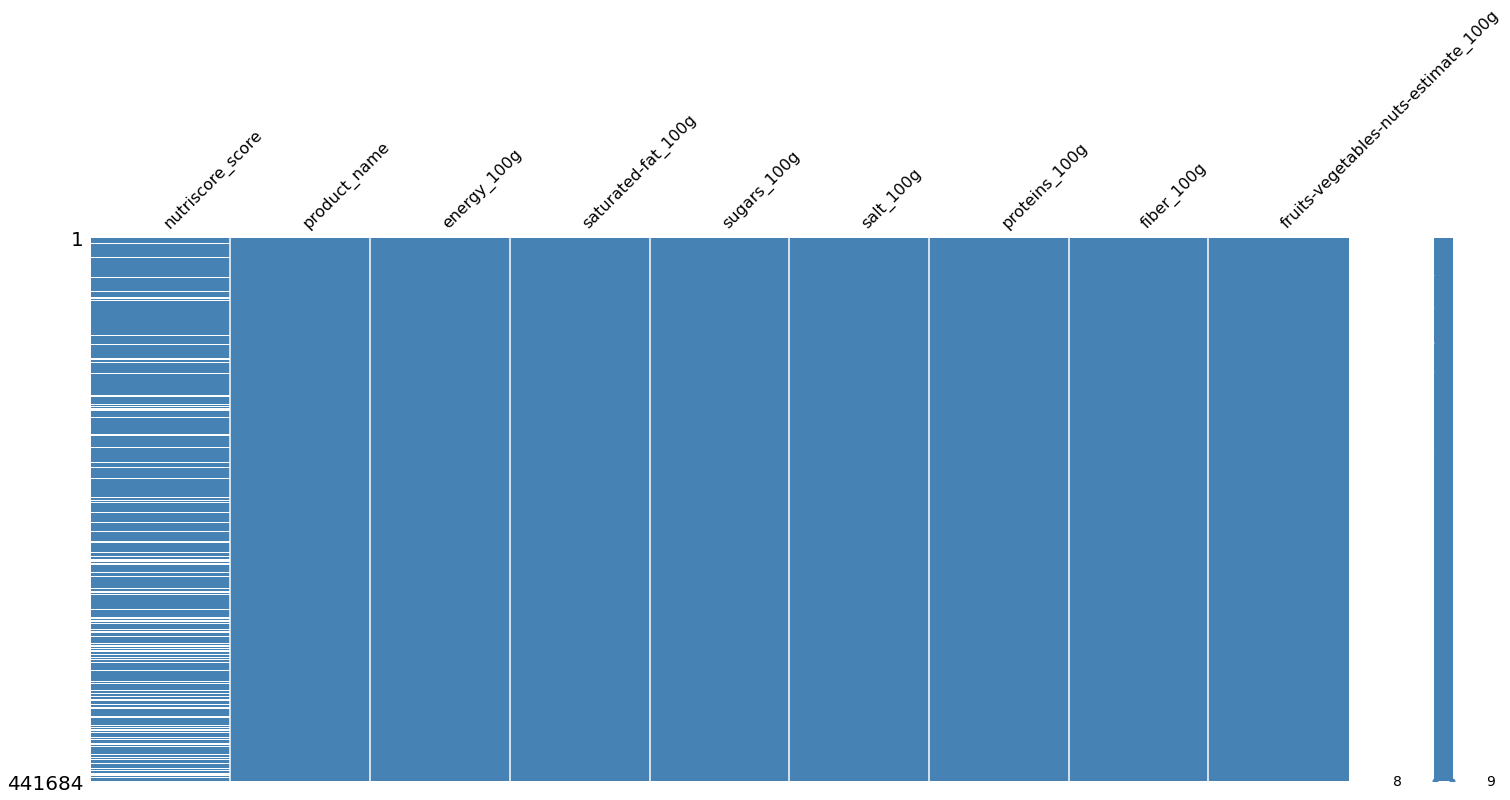

In [44]:
# Remplacement des valeurs Nan par 0 pour toutes les valeurs manquantes de fruits-vegetables-nuts-estimate_100g
df.iloc[:,-1]=df.iloc[:,-1].fillna(0)
msno.matrix(df,color=color)

Recherche des valeurs aberrantes

In [45]:
# Fonction synthétisant pour chaque colonne d'un Data Frame,
# le nombre de valeurs renseignées,
# la valeur minimum renseignée,
# la valeur maximum renseignée.
# Retourne la synthèse dans un Data Frame
def Etendue(table):
    agg = table.agg(['count', 'min', 'max'])
    return agg

In [46]:
Etendue(df)

,nutriscore_score,product_name,energy_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts-estimate_100g
count,367846.0,441684,4.416840e+05,4.416840e+05,441684.0,441684.0,441684.0,441684.0,441684.0
min,-15.0,18 marrons glacés,0.000000e+00,0.000000e+00,-1.0,0.0,-1.0,-20.0,0.0
max,40.0,🤬,4.184000e+10,1.360000e+14,1350.0,66700.0,2000.0,2020.0,100.0


#### Deuxième conjecture:

    - Le nutriscore varie de -15 à +40 par définition du mode de calcul.

    - L'energie maximum pour 100g est de 3700 Kj/100g ( 37kJ/g pour les lipides  )

    - Les autres valeurs doivent être comprises entre 0g et 100g

In [47]:
import numpy as np
# Fonction qui remplace les valeurs aberrantes par Nan quand elles sont en dehors de [min;max]
# Retourne la série traitée.
def out_range (serie= None, min=-np.inf, max= np.inf):
    serie=[x if x <=max else np.nan for x in serie]
    serie=[x if x >= min else np.nan for x in serie]
    return serie

In [48]:
# Traitement des valeurs aberrantes du Data Frame
# Retourne le Data Frame traité 
def cut_off(table):
    for col in table.columns.to_list():
        if table[col].dtypes== 'float64':
            if col=='nutriscore_score':
                table[col]=out_range(table[col],-15,40)
            elif col == 'energy_100g':
                table[col]=out_range(table[col],0,3700)
            else :
                table[col]=out_range(table[col],0,100)
    return table       

Traitement des valeurs aberrantes de df

In [49]:
df=cut_off(df)
Etendue(df)

,nutriscore_score,product_name,energy_100g,saturated-fat_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts-estimate_100g
count,367846.0,441684,440509.0,441680.0,441666.0,441288.0,441672.0,441660.0,441684.0
min,-15.0,18 marrons glacés,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,40.0,🤬,3700.0,100.0,100.0,100.0,100.0,100.0,100.0


Plus de valeurs aberrantes.

Supression des lignes contenant des Nan, ce qui correspond à des produits dont les valeurs des différents nutriments contenaient des valeurs aberrentes.

In [50]:
df=df.dropna(subset=df.iloc[:,2:].columns.to_list(),how='any',axis=0) 
df.shape

(440075, 9)


### Troisième conjecture:
 
     - Vérification que la somme des composantes pour 100g ne dépasse pas 100g


Création de la liste des colonnes ne contenant que des quantités de nutriments

In [51]:
liste_colonnes_100g=df.columns.to_list()
liste_colonnes_100g.remove('nutriscore_score')
liste_colonnes_100g.remove('product_name')
liste_colonnes_100g.remove('energy_100g')

liste_colonnes_100g

['saturated-fat_100g',
 'sugars_100g',
 'salt_100g',
 'proteins_100g',
 'fiber_100g',
 'fruits-vegetables-nuts-estimate_100g']

In [52]:
# Ajout d'une colonne contenant la somme des composantes des variables contenues dans
# la liste de colonnes cols de chaque produit.
# Renvoie une liste contenant les index des lignes à supprimer car non conformes
def somme_sup_100g(d,target):
    # création de la colonne somme
    d['total_100g']=df[target].sum(axis=1)
    # afectation à rangs de l'index des lignes non conformes
    rangs=d[d['total_100g']>100].index
    
    # on renvoie les index des lignes pour lesquelles cette somme >100drop des lignes poue lesquelles cette somme >100
    return rangs

In [53]:
print('Nombre de produits ayant plus de 100_g cumulés :', len(somme_sup_100g(df,liste_colonnes_100g)))

Nombre de produits ayant plus de 100_g cumulés : 2610


In [54]:
df=df.drop(somme_sup_100g(df,liste_colonnes_100g),axis=0)
# drop de la colonne total_100g
df=df.drop('total_100g',axis=1)
df.shape

(437465, 9)

<AxesSubplot:>

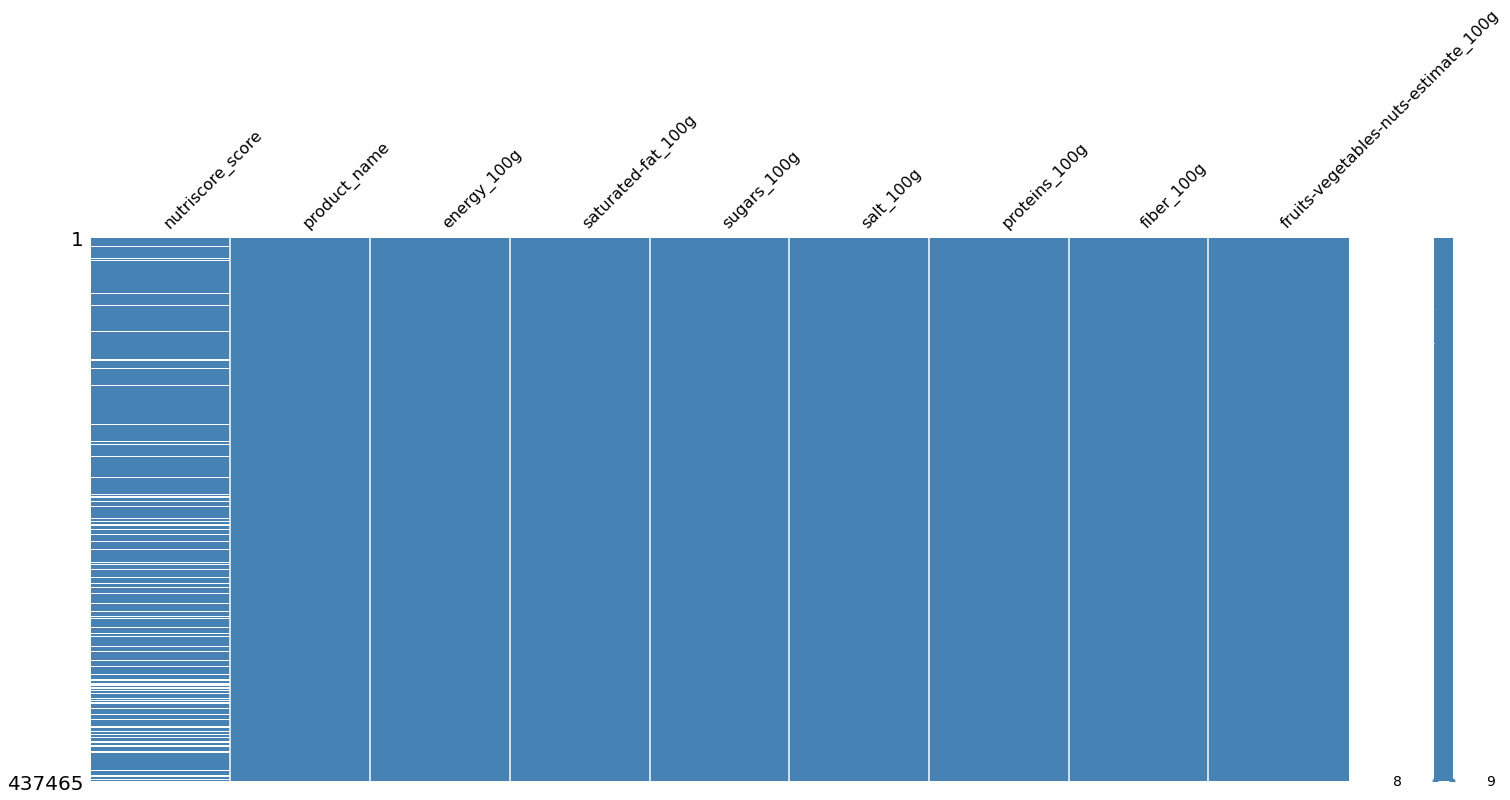

In [55]:
msno.matrix(df,color=color)

# Séparation en deux Data Frames:
    - data_train contient les produits pour lesquels le nutriscore est connu.
    - data_predict contient les produits pour lesquels le nutriscore sera à prédire.

<AxesSubplot:>

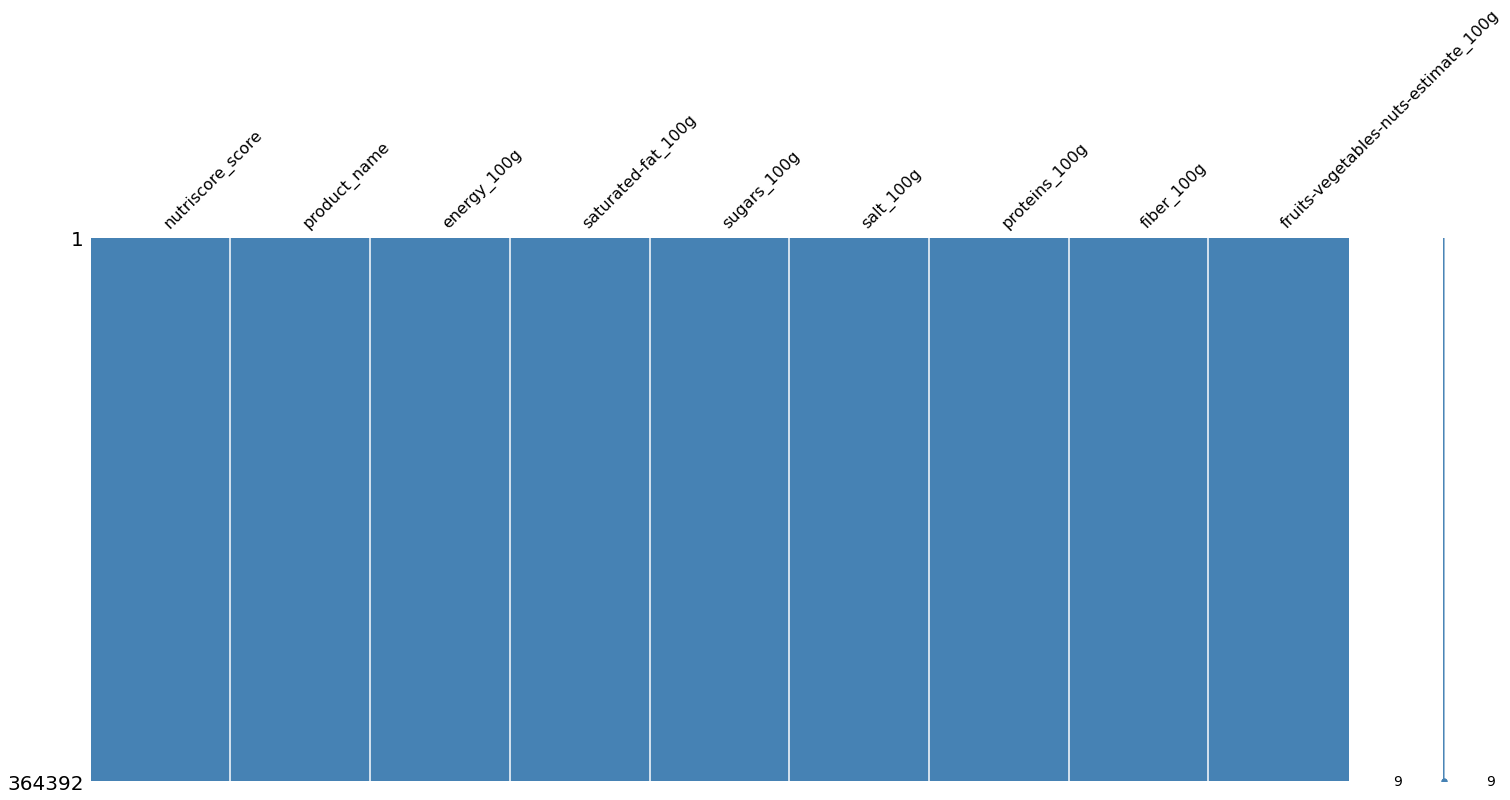

In [56]:
data_train = df.dropna(subset=['nutriscore_score'],axis=0)
msno.matrix(data_train,color=color)

Création de data_predict en soustrayant les lignes de data_train de df

<AxesSubplot:>

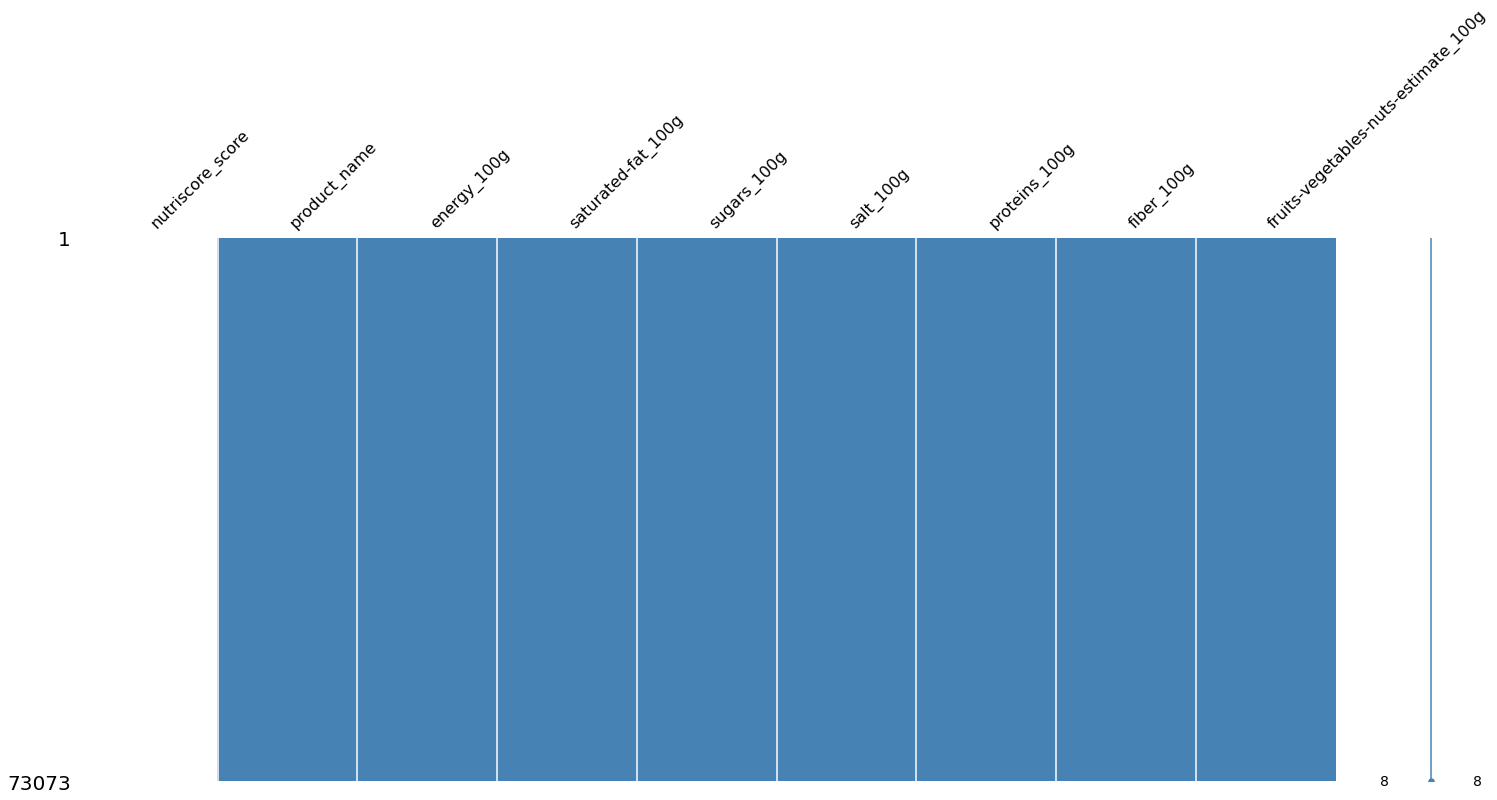

In [57]:
data_predict=df.drop(data_train.index)
msno.matrix(data_predict,color=color)

# Fin du nettoyage des données

data_train contient 364 392 produits pour lesquels le nutriscore est connu et 7 variables renseignées

data_predict contient 73 073 produits pour lesquels le nutriscore est inconnu et 7 variables renseignées

Enregistrement des  datasets nettoyés  dans des fichers .csv afin de pouvoir procéder à l'analyse exploratoire dans un notebook séparé.




In [58]:
data_train.to_csv('../Données/Food_data_train.csv')

data_predict.to_csv('../Données/Food_data_predict.csv')